In [1]:
import os
import numpy as np

import matplotlib.pyplot as plt
from PIL import Image
from sklearn.utils import shuffle
from sklearn.neighbors import NearestNeighbors

In [2]:
training_directory = './train'
testing_directory = './test'

training_filenames = os.listdir(training_directory)
cat_training = [x for x in training_filenames if 'cat' in x]
dog_training = [x for x in training_filenames if 'dog' in x]


In [8]:
def convert_image(name_arr, directory):
    return_arr = []
    for name in name_arr:
        temp_img = Image.open(directory + '/' + name)
        temp_img = temp_img.resize((128,128), resample=Image.BICUBIC)
        return_arr.append(np.asarray(temp_img).reshape(-1))
    return np.asarray(return_arr, dtype=np.float16)

In [9]:
converted_cat = convert_image(cat_training, training_directory)
converted_dog = convert_image(dog_training, training_directory)

data = np.vstack((converted_cat,converted_dog))

In [24]:
nearest_neighbor_kd = NearestNeighbors(n_neighbors = 9, algorithm='kd_tree').fit(data)

In [ ]:
kaggle_data = convert_image(os.listdir(testing_directory), testing_directory)

kaggle_nearest = nearest_neighbor_kd.kneighbors(kaggle_data)

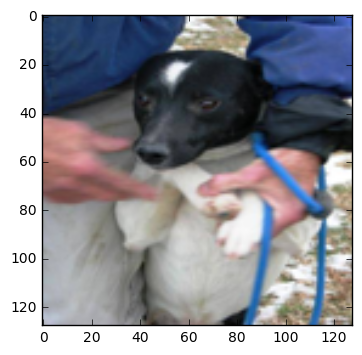

In [23]:
labels = np.zeros(25000, dtype=np.float16)
labels[12500:] = 1.0

sum(labels[kaggle_nearest[1][0]]) / 9

plt.imshow(kaggle_data[0].astype(np.uint8).reshape(128,128,3))
plt.show()